## Replication of Norris figure 2

This document attempts to replicate Pippa Norris'figure 2 in her 2017 article.

Her figure 2 broke the trend down by country while my implementation pooled all countries and take the mean of the importance of democracy score of each age group.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wv5 = pd.read_csv("wave5.csv")
wv6 = pd.read_csv("wave6.csv")

In [4]:
# var of interests
# wv6 -> V140, V2, V241
# wv5 -> V162, V2, V236

In [5]:
wv5_filtered = wv5[['V2', 'V162', 'V236']]

In [6]:
wv6_filtered = wv6[['V2', 'V140', 'V241']]

In [7]:
wv5_filtered.columns = ['countries', 'imp_dem', 'birthyear']
wv6_filtered.columns = ['countries', 'imp_dem', 'birthyear']

In [8]:
wv5_filtered['countries'].unique()

array(['Andorra', 'Argentina', 'Australia', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Canada', 'Colombia', 'Cyprus', 'Chile', 'China',
       'Egypt', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Guatemala', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Italy', 'Japan', 'Jordan', 'Malaysia', 'Mali',
       'Mexico', 'Moldova', 'Morocco', 'Netherlands', 'New Zealand',
       'Norway', 'Peru', 'Poland', 'Romania', 'Russia', 'Rwanda',
       'Serbia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Trinidad and Tobago', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam', 'Zambia'], dtype=object)

In [9]:
country = ['Australia', 'Canada', 'Chile', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany',
           'Hungary', 'Italy', 'Japan', 'South Korea', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
           'Romania', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States', 'Uruguay']

In [10]:
wv5_filtered2 = wv5_filtered.loc[wv5_filtered['countries'].isin(country)]

In [11]:
wv6_filtered2 = wv6_filtered.loc[wv6_filtered['countries'].isin(country)]

In [12]:
all_countries = set(wv5_filtered2['countries'].unique()).union(set(wv6_filtered2['countries'].unique()))
len(all_countries)

24

In [13]:
wv5_filtered3 = wv5_filtered2[wv5_filtered2["birthyear"].isin([-5, -1, -2]) == False]
wv6_filtered3 = wv6_filtered2[wv6_filtered2["birthyear"].isin(['No answer']) == False]

In [14]:
wv5_filtered3['birthyear'] = wv5_filtered3['birthyear'].astype('int64')
wv6_filtered3['birthyear'] = wv6_filtered3['birthyear'].astype('int64')

In [15]:
cats = [i for i in range(1, 11)]
wv5_filtered3['imp_dem'].loc[wv5_filtered3['imp_dem'] == 'Not at all important'] = 1
wv5_filtered3['imp_dem'] = wv5_filtered3['imp_dem'].astype('int64')
wv5_filtered3 = wv5_filtered3[wv5_filtered3["imp_dem"].isin(cats)]
wv5_filtered3['imp_dem'] = wv5_filtered3['imp_dem'].astype('category')

In [16]:
wv6_filtered3['imp_dem'].loc[wv6_filtered3['imp_dem'] == 'Not at all important'] = 1
wv6_filtered3['imp_dem'] = wv6_filtered3['imp_dem'].astype('int64')
wv6_filtered3 = wv6_filtered3[wv6_filtered3["imp_dem"].isin(cats)]
wv6_filtered3['imp_dem'] = wv6_filtered3['imp_dem'].astype('category')

In [17]:
labels = ["'{0} - '{1}".format(i, i + 9) for i in range(0, 100, 10)]
wv5_filtered3['group'] = pd.cut(wv5_filtered3['birthyear'], range(1900, 2005, 10), right=False, labels=labels)
wv5_filtered3.head()

,countries,imp_dem,birthyear,group
2005,Australia,10,1921,'20 - '29
2006,Australia,10,1939,'30 - '39
2007,Australia,10,1954,'50 - '59
2008,Australia,10,1947,'40 - '49
2009,Australia,9,1965,'60 - '69


In [18]:
wv6_filtered3['group'] = pd.cut(wv6_filtered3['birthyear'], range(1900, 2005, 10), right=False, labels=labels)
wv6_filtered3.head()

,countries,imp_dem,birthyear,group
3330,Australia,10,1953,'50 - '59
3331,Australia,9,1967,'60 - '69
3332,Australia,4,1946,'40 - '49
3333,Australia,10,1952,'50 - '59
3334,Australia,10,1964,'60 - '69


In [19]:
df_final = wv5_filtered3.append(wv6_filtered3, ignore_index=True)

In [20]:
df_final['imp_dem'] = df_final['imp_dem'].astype('int64')

In [21]:
imp_scores_by_age_group = df_final.groupby(['group']).mean()['imp_dem']

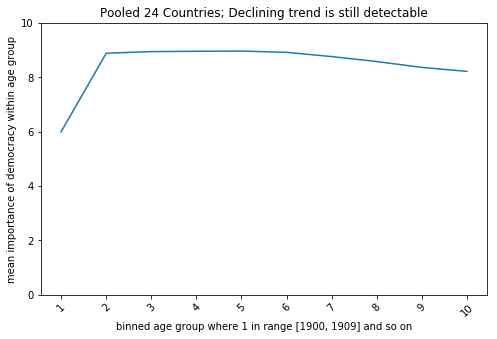

Please note that Norris excluded group 1, 2, 9 and 10 in her plot


In [22]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 10) 
plt.plot(list(imp_scores_by_age_group.index), imp_scores_by_age_group.values)
plt.xticks(np.arange(10), [i for i in range(1, 11)], rotation=45)
plt.title('Pooled 24 Countries; Declining trend is still detectable')
plt.xlabel('binned age group where 1 in range [1900, 1909] and so on')
plt.ylabel('mean importance of democracy within age group')
plt.savefig('replicated_pooled_figure2.png')
plt.show()
print('Please note that Norris excluded group 1, 2, 9 and 10 in her plot')